In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
from scipy.special import erf
import matplotlib.pyplot as plt

/Users/gabrielfior/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [ ]:
print 'reading...'
t0 = datetime.datetime.now()
filename = '10000cm_1e6_400GeV_Rb10minus7_beam_cut1_5mm_nt_B4_g.csv'
#filename = '1cm_1e6_400GeV_Rb10minus4_beam_cut1_5mm_nt_B4_g.csv'
columns_new2 =['trackId','parentId','volumeName','particleName','stepNumber',
                                                   'posX','posY','posZ','perp','kineeticEnergyDiff',
                                                   'edepStep','kineticEnergyPostStep','processName',
                                    'mompreX','mompreY','mompreZ','momposX','momposY','momposZ',
                  'stepLength','totalEnergyDeposit']#,'particleId'] 
filename2 = '/Volumes/UNTITLED/beam/long_10minus7_thesis2/10000cm_1e6_400GeV_Rb10minus7_beam_cut1_5mm_nt_B4_g.csv'
df = pd.read_csv(filename2,skiprows=25,header=None,names=columns_new2)#,nrows=10000)

print 'elapsed: '+str(datetime.datetime.now()-t0)
print 'shape: '+str(df.shape)

In [ ]:
df.head()

In [ ]:
# Case with particle ID in dataset
print 'reading...'
t0 = datetime.datetime.now()
columns_new2 =['trackId','parentId','volumeName','particleName','stepNumber',
                                                   'posX','posY','posZ','perp','kineeticEnergyDiff',
                                                   'edepStep','kineticEnergyPostStep','processName',
                                    'mompreX','mompreY','mompreZ','momposX','momposY','momposZ',
                  'stepLength','particleId'] 
df = pd.read_csv('/Volumes/UNTITLED/beam/10minus4/merged10minus4.csv',
header=None,names=columns_new2)#,nrows=10000)
print 'elapsed: '+str(datetime.datetime.now()-t0)
print 'shape: '+str(df.shape)

In [ ]:
len(df.particleId.unique())

In [ ]:
print df.particleId.max()
df[df.particleId==1000000].head()

In [ ]:
#df.to_csv('10minus7_longercell.csv')

In [ ]:

print 'reading...'
t0 = datetime.datetime.now()
df['flag_event'] = df.particleName.apply(lambda x: 1 if x=='event' else 0)
print 'elapsed: '+str(datetime.datetime.now()-t0)


In [ ]:
print 'reading...'
t0 = datetime.datetime.now()
df['particleId'] = df.flag_event.cumsum()
print 'elapsed: '+str(datetime.datetime.now()-t0)

In [ ]:
print 'reading...'
t0 = datetime.datetime.now()
df = df[df.particleName!='event']
print 'elapsed: '+str(datetime.datetime.now()-t0)


In [ ]:
df.columns

In [ ]:
# WRONG
# Detecting if there is particle ID with more particles
grouped2 = df.groupby(by='particleId',as_index=False).size()

In [ ]:
grouped2.sort_values(ascending=False).head()
#df.particleId.unique()
df[df.particleId==208720.0].head(5)

In [ ]:
elec = df[(df.particleName=='e-') | (df.particleName==' e-')].groupby(by='particleId',as_index=False).agg({
    'mompreX':max,
    'mompreY':max,
    'mompreZ':max,
    'momposX':max,
    'momposY':max,
    'momposZ':max,
    'kineticEnergyPostStep':max
})
elec_min = df[(df.particleName=='e-') | (df.particleName==' e-')].groupby(by='particleId',as_index=False).agg({
    'mompreX':min,
    'mompreY':min,
    'mompreZ':min,
    'momposX':min,
    'momposY':min,
    'momposZ':min
})

In [ ]:
print elec.shape
elec.head()

In [ ]:
df[(df.particleId==5) & (df.particleName!=' proton')].head()

In [ ]:
# print total momentum perp, momentum z
print 'reading...'
t0 = datetime.datetime.now()
elec['momentum_perp'] = elec.apply(lambda x: np.sqrt(x['mompreX']**2 + x['mompreY']**2),axis=1)
#elec_min['momentum_perp'] = elec_min.apply(lambda x: np.sqrt(x['mompreX']**2 + x['mompreY']**2),axis=1)
elec['momentum_perp_pos'] = elec.apply(lambda x: np.sqrt(x['momposX']**2 + x['momposY']**2),axis=1)
print 'elapsed: '+str(datetime.datetime.now()-t0)

In [ ]:
plt.figure(1)
plt.subplot(211)
plt.yscale('log', nonposy='clip')
plt.hist(elec.momentum_perp_pos/1e3,bins=np.linspace(0,200,100))
plt.title('Radial momentum log')
plt.subplot(212)
#plt.yscale('log', nonposy='clip')
plt.hist(elec.momentum_perp_pos/1e3,bins=np.linspace(0,200,100))
plt.title('Radial momentum')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(1)
plt.subplot(211)
plt.yscale('log', nonposy='clip')
plt.hist(elec.mompreZ/1e3,bins=np.linspace(0,100,100))
plt.title('Longitudinal momentum log')
plt.subplot(212)
#plt.yscale('log', nonposy='clip')
plt.hist(elec.mompreZ/1e3,bins=np.linspace(0,100,100))
plt.title('Longitudinal momentum')
plt.tight_layout()
plt.show()

In [ ]:
print elec.momentum_perp.max()
print elec.momentum_perp.min()

In [ ]:
# Sanity check - energy loss
df[df.particleName=='proton'].head()

In [ ]:
grouped = df.groupby(by=['particleId','particleName'],as_index=False).agg({'stepLength':sum,'edepStep':sum})

In [ ]:
grouped['edep_mm'] = grouped.edepStep/grouped.stepLength #eV/mm

In [ ]:
grouped[grouped.particleName=='proton'].edep_mm.mean()*10

# Plotting velocities

In [ ]:
# Group by track_ID, parentID, particleID (we only want electrons)
elec2 = df[df.particleName == 'e-'].copy()
#elec2 = df[df.particleName == 'e-'].copy()
print elec2.shape

In [ ]:
print (elec2.particleName.unique())
#print elec2[elec2.particleName==' gamma'].shape

In [ ]:
grouped_el = elec2.groupby(['particleId','trackId','parentId'],as_index=False).agg({
    'mompreX':max,
    'mompreY':max,
    'mompreZ':max,
    'momposX':max,
    'momposY':max,
    'momposZ':max,
    'kineticEnergyPostStep':max,
    'posX':max,
    'posY':max
})

In [ ]:
grouped_el['momentum_perp'] = grouped_el.apply(lambda x: np.sqrt(x['mompreX']**2 + x['mompreY']**2),axis=1)

In [ ]:
grouped_el.head()

In [ ]:
plt.figure(1,figsize=(6,4))
plt.subplot(111)
plt.yscale('log', nonposy='clip')
#plt.title('Radial momentum - 10^-7')
plt.ylabel('Counts')
plt.xlabel(r'Radial momentum $(keV/c^2)$')
plt.hist(grouped_el.momentum_perp/1e3,bins=np.linspace(0,150,100))
#
plt.figure(2,figsize=(6,4))
plt.subplot(111)
#plt.yscale('log', nonposy='clip')
plt.hist(grouped_el.momentum_perp/1e3,bins=np.linspace(0,150,100))
plt.ylabel('Counts')
plt.xlabel(r'Radial momentum $(keV/c^2)$')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(1,figsize=(6,4))
plt.subplot(111)
plt.yscale('log', nonposy='clip')
#plt.title('Radial momentum - 10^-7')
plt.ylabel('Counts')
plt.xlabel(r'Longitudinal momentum $(keV/c^2)$')
plt.hist(grouped_el.mompreZ/1e3,bins=np.linspace(-50,50,100))
#
plt.figure(2,figsize=(6,4))
plt.subplot(111)
#plt.yscale('log', nonposy='clip')
plt.hist(grouped_el.mompreZ/1e3,bins=np.linspace(-50,50,100))
plt.ylabel('Counts')
plt.xlabel(r'Longitudinal momentum $(keV/c^2)$')
plt.tight_layout()
plt.show()

# Why do we have a smaller contribution for low energies?

In [ ]:
plt.figure(1)
plt.hist(grouped_el.momentum_perp[grouped_el.momentum_perp<18*1e3]/1e3,bins=np.linspace(0,25,100))
plt.show()

In [ ]:
low_enegy_el = grouped_el[grouped_el.momentum_perp<18*1e3]

In [ ]:
low_enegy_el.head()

In [ ]:
# inner join elec2
result = pd.merge(elec2, low_enegy_el, how='inner', on=['particleId', 'trackId','parentId'])

In [ ]:
print len(result.particleId.unique())
print len(low_enegy_el.particleId.unique())

In [ ]:
#result[result.particleId==5712].head(10)
result.head()

In [ ]:
result['posR'] = result.apply(lambda x: np.sqrt(x['posX_x']**2 + x['posY_x']**2),axis=1)

In [ ]:
plt.figure()
plt.hist(result.posR,bins=np.linspace(0,42,100))
#plt.title('Histogram of radial position - low energy electrons')
plt.xlabel('Pos R (mm)')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

In [ ]:
print 'mean step length: %.2f (mm)' %result.stepLength.mean()
print 'mean step number: %.2f ' %result.stepNumber.mean()

In [ ]:
"""
plt.figure(1)
plt.subplot(211)
plt.hist(result.stepNumber,bins=np.linspace(0,8,20))
plt.title('Histogram - number of steps of electron, mean = %.2f' %(result.stepNumber.mean()))
plt.yscale('log', nonposy='clip')
###
plt.subplot(212)
plt.hist(result.stepLength,bins=np.linspace(0,300,100))
plt.title('Histogram - step length of electron, mean = %.2f' %(result.stepLength.mean()))
plt.yscale('log', nonposy='clip')
plt.xlabel('Step length (mm)')
plt.tight_layout()
plt.show()
"""
plt.figure(2)
plt.hist(result.stepLength,bins=np.linspace(0,300,100),label= 'mean = %.2f' %(result.stepLength.mean()))
#plt.title('Histogram - step length of electron, mean = %.2f' %(result.stepLength.mean()))
plt.yscale('log', nonposy='clip')
plt.xlabel('Step length (mm)')
plt.ylabel('Counts')
plt.legend()
plt.tight_layout()
plt.show()


# Processes of high energy electrons

In [ ]:
high_energy_el = grouped_el[grouped_el.momentum_perp>18*1e3]

In [ ]:
result_high = pd.merge(elec2, high_energy_el, how='inner', on=['particleId', 'trackId','parentId'])

In [ ]:
result_high['posR'] = result_high.apply(lambda x: np.sqrt(x['posX_x']**2 + x['posY_x']**2),axis=1)

In [ ]:
result_high.processName.value_counts()

In [ ]:
# Where is eIoni taking place?
ioni = result_high[result_high.processName=='eIoni'].copy()
transp = result_high[result_high.processName=='Transportation'].copy()
print ioni.shape, transp.shape

In [ ]:
plt.figure(1)
plt.clf()
plt.subplot(111)
plt.yscale('log', nonposy='clip')
plt.hist(ioni.perp,label= 'total events = %d' %(ioni.shape[0]))
#plt.title('Histogram of ionization events (total= %d)' %(ioni.shape[0]))
plt.xlabel('Pos R (mm)')
plt.xlim([0,40.])
plt.ylabel('Counts')
plt.legend()
plt.tight_layout()
##
plt.figure(2)
plt.subplot(111)
plt.hist(transp.perp,label= 'total events = %d' %(transp.shape[0]))
plt.yscale('log', nonposy='clip')
#plt.title('Histogram of transportation events (total= %d)' %(transp.shape[0]))
plt.xlabel('Pos R (mm)')
plt.ylabel('Counts')
plt.xlim([0,40.])
plt.legend()
plt.tight_layout()
plt.show()


# identifying collisions - graph Lapique

In [ ]:
"""
df['flag_hioni'] = df.processName.apply(lambda x: 1 if x==' hIoni' else 0)
# group by particle Id
grouped_colls = df.groupby(by='particleId',as_index=False).agg({'flag_hioni':sum,'stepLength':sum,'edepStep':sum})
grouped_colls['flag_hioni']= pd.to_numeric(grouped_colls.flag_hioni)
grouped_colls.stepLength = pd.to_numeric(grouped_colls.stepLength)
grouped_colls.edepStep = pd.to_numeric(grouped_colls.edepStep)
grouped_colls['avg_col'] = 0.
grouped_colls['avg_col'] = grouped_colls[grouped_colls.flag_hioni>0]['flag_hioni']/grouped_colls[grouped_colls.flag_hioni>0]['stepLength']
grouped_colls['avg_energy'] = grouped_colls[grouped_colls.flag_hioni>0]['edepStep']/grouped_colls[grouped_colls.flag_hioni>0]['flag_hioni']
print grouped_colls[grouped_colls.flag_hioni>0].shape
print grouped_colls.shape
"""

In [ ]:
#protons = df[(df.particleName=='proton') & (df.processName!='Transportation')].copy()
protons = df[((df.processName =='hIoni') | (df.processName =='eIoni'))].copy()

In [ ]:
protons.processName.unique()

In [ ]:
plt.hist(protons.totalEnergyDeposit,bins=np.linspace(0,700,100))
plt.show()

In [ ]:
print 'reading...'
t0 = datetime.datetime.now()
#E = 100 #ev
list_Es=[]
list_edep = []
num_steps=1000
for E in np.linspace(0,int(protons.totalEnergyDeposit.max()),num_steps):
    list_Es.append([E,protons[protons.totalEnergyDeposit>E].shape[0]])
    list_edep.append([E,protons[protons.edepStep>E].shape[0]])
    
print 'elapsed: '+str(datetime.datetime.now()-t0)

In [ ]:
print protons.shape[0]
#print list_Es[:5]
print [protons.totalEnergyDeposit.min(),protons.totalEnergyDeposit.max()]

In [ ]:
#plt.figure(1,figsize=(12,8))
plt.figure(1)
plt.subplot(211)
plt.scatter(np.array(list_Es)[:,0],np.array(list_Es)[:,1])
#plt.xlim([-100,800])
plt.yscale('log', nonposy='clip')
plt.title('')
plt.ylabel(r'$(\frac{dN}{dx}) cm^{-1}$')
plt.xlabel('E (eV)')
#plt.ylim([1e-7,1e1])
plt.subplot(212)
plt.scatter(np.array(list_Es)[:,0],np.array(list_Es)[:,1]/protons.shape[0])
#plt.yscale('log', nonposy='clip')
plt.ylabel('%')
plt.tight_layout()
plt.show()

In [ ]:
#plt.figure(1,figsize=(12,8))
plt.figure(1)
plt.subplot(111)
plt.scatter(np.array(list_Es)[:,0],np.array(list_Es)[:,1])
plt.xlim([-100,2000])
plt.yscale('log', nonposy='clip')
plt.title('')
plt.ylabel(r'$(\frac{dN}{dx}) cm^{-1}$')
plt.xlabel('E (eV)')
#plt.ylim([1e-7,1e1])
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
np.array(list_edep)[:,1].sum()

In [ ]:
np.array(list_Es)[:,0]

In [ ]:
protons[protons.edepStep==0.0]['processName'].unique()

In [ ]:
df.posZ.min()

In [ ]:
np.savetxt('export.txt',np.array(list_Es),header='Energy, number of collisions')

In [ ]:
protons.shape[0]

# Radial distribution - energy

In [ ]:
plt.figure(1)
plt.subplot(121)
#plt.yscale('log', nonposy='clip')
plt.title('Energy of secondary electron vs radius')
plt.ylabel('Energy (eV))')
plt.xlabel('Radius (mm)')
plt.scatter(np.sqrt(grouped_el.posX**2 + grouped_el.posY**2),grouped_el.kineticEnergyPostStep)
#plt.ylim([1e-10,1e-1])

plt.subplot(122)
plt.scatter(np.sqrt(grouped_el.posX**2 + grouped_el.posY**2),grouped_el.kineticEnergyPostStep)
#plt.ylim([-0.1,1])
plt.ylim([1e2,1e7])
plt.yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure()
sns.jointplot(x=np.sqrt(grouped_el.posX**2 + grouped_el.posY**2), y=grouped_el.kineticEnergyPostStep)
plt.yscale('log', nonposy='clip')
#plt.ylim([0.,1e6])
plt.show()

In [ ]:
# Find duplicates
elec2['flag_duplicated'] = elec2.duplicated(['trackId','parentId','particleId'])

In [ ]:
elec_born = elec2[elec2.flag_duplicated==False]

In [ ]:
elec_born.shape

In [ ]:
plt.figure(1)
ax = sns.jointplot(x=np.sqrt(elec_born.posX**2 + elec_born.posY**2), y=elec_born.kineticEnergyPostStep
                   )
ax.set_axis_labels(xlabel='Radial position (mm)', ylabel='Energy (eV)')
#ax.ax_marg_y.set_yscale('log', nonposy='clip',[0.,1e6])
plt.yscale('log', nonposy='clip')
#plt.ylim([0.,1e6])
plt.show()

In [ ]:
print df.posZ.min()
print df.posZ.max()

In [ ]:
df[df.particleName=='proton'].iloc[0]['totalEnergyDeposit']/df[df.particleName=='proton'].iloc[0]['stepLength']

# Plotting final figure

In [16]:
print 'calculating'
t0=datetime.datetime.now()
x = np.random.normal(loc=0.0,scale=2.,size=int(1e6))
print 'done, elapsed :' + str(datetime.datetime.now()-t0)

calculating
done, elapsed :0:00:00.036083


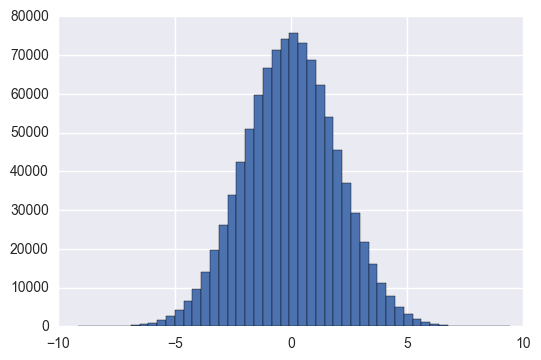

In [18]:
plt.figure(1)
plt.hist(x,bins=50)
y = np.histogram(x,bins=50)
plt.show()

In [27]:
y

(array([    3,     2,     5,    27,    35,    79,   120,   262,   560,
          922,  1600,  2585,  4254,  6500,  9724, 13991, 19659, 26257,
        33997, 42353, 51028, 59567, 66617, 71331, 74235, 75619, 72993,
        68726, 62285, 54100, 45429, 36976, 29143, 21658, 15963, 11245,
         7707,  4917,  3063,  1878,  1158,   676,   364,   198,    96,
           42,    34,    10,     5,     2]),
 array([-9.53997012, -9.16118865, -8.78240719, -8.40362572, -8.02484425,
        -7.64606278, -7.26728132, -6.88849985, -6.50971838, -6.13093691,
        -5.75215545, -5.37337398, -4.99459251, -4.61581104, -4.23702958,
        -3.85824811, -3.47946664, -3.10068517, -2.72190371, -2.34312224,
        -1.96434077, -1.58555931, -1.20677784, -0.82799637, -0.4492149 ,
        -0.07043344,  0.30834803,  0.6871295 ,  1.06591097,  1.44469243,
         1.8234739 ,  2.20225537,  2.58103684,  2.9598183 ,  3.33859977,
         3.71738124,  4.0961627 ,  4.47494417,  4.85372564,  5.23250711,
         5.61128

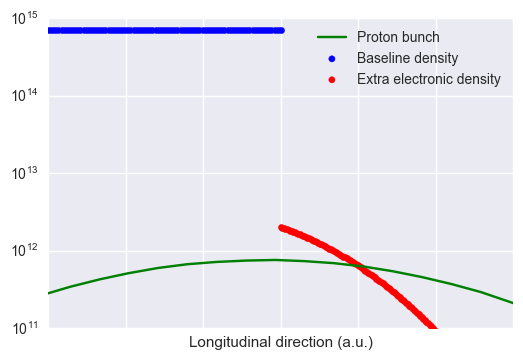

In [87]:
plt.figure(1)
plt.clf()
range_x = np.linspace(0., 2.,100)
range_x_minus = np.linspace(-4., 0,100)
baseline = 1e14*np.ones_like(range_x_minus)
range_erf = erf(-range_x/np.sqrt(2))
Phi = 2*1e12*(1 + range_erf)
plt.yscale('log', nonposy='clip')
plt.ylim([1e11,1e15])
plt.xlim([-3.,3.])
#plt.scatter(range_x,Phi,color='red')
plt.scatter(range_x_minus,7e14*np.ones_like(range_x_minus),color='blue',label='Baseline density')
plt.scatter(range_x,Phi,color='red',label='Extra electronic density')
plt.plot(y[1][:-1],y[0]*1e7,'g',label='Proton bunch')
plt.xlabel('Longitudinal direction (a.u.)')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
plt.legend()
plt.show()

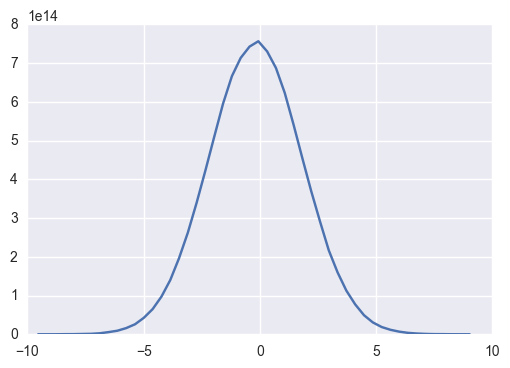